# Introduction to OpenCV
https://docs.opencv.org/4.5.2/da/df6/tutorial_py_table_of_contents_setup.html

In [275]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

%matplotlib inline

## Template Matching cv2.matchTemplate()
Use to find objects in images based on a given image (called template).
However the size and the quality of images play an important role and we have to constantly resize the template when doing mathing.

This is very time consuming and the complexity would be based on how many time you resize it.
For example:
    loc = np.where( res >= threshold)
    for pt in zip(*loc[::-1]): # adjust the size

If you have a document and you want to classify it, using Text Similarity will give you better result and faster algorithm.

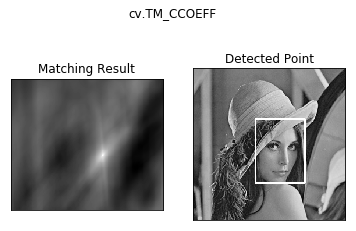

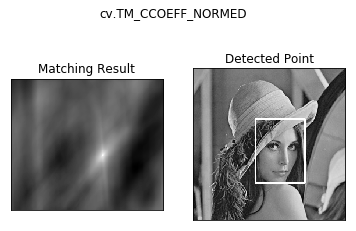

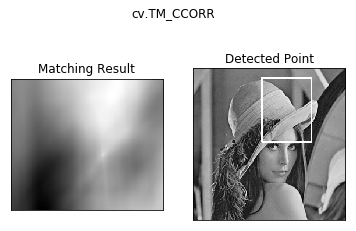

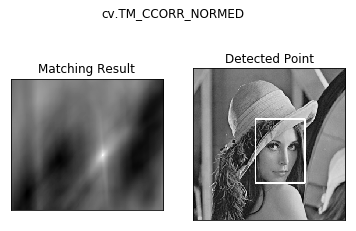

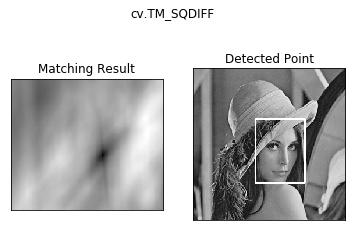

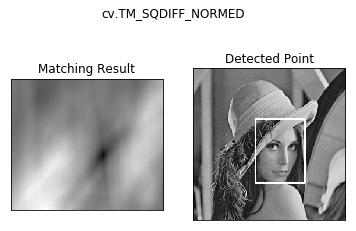

In [384]:
img = cv.imread('lena.jpg',0)
img2 = img.copy()
template = cv.imread('face.jpg',0)
h, w = template.shape[:2]

# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img, template, method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

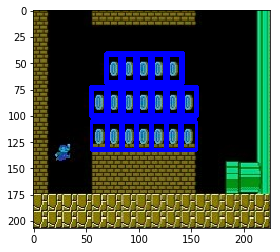

In [387]:
img_rgb = cv.imread('mario.jpg', 1)
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
template = cv.imread('mario_coin.jpg',0)
w, h = template.shape[::-1]


res = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF_NORMED)
threshold = 0.8


loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]): # adjust the size
    cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
    plt.imshow(img_rgb, cmap = 'gray')

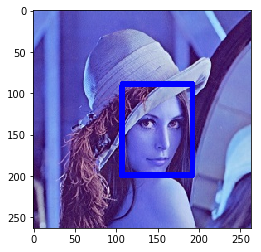

In [390]:
img_rgb = cv.imread('lena.jpg', 1)
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
template = cv.imread('face.jpg',0)
w, h = template.shape[::-1]


res = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF_NORMED)
threshold = 0.8


loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
    plt.imshow(img_rgb, cmap = 'gray')